# IMPORT DATA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/admin/UOP AMLDM/Untitled Folder/gender_classification_v7.csv")

# DATA UNDERSTANDING

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


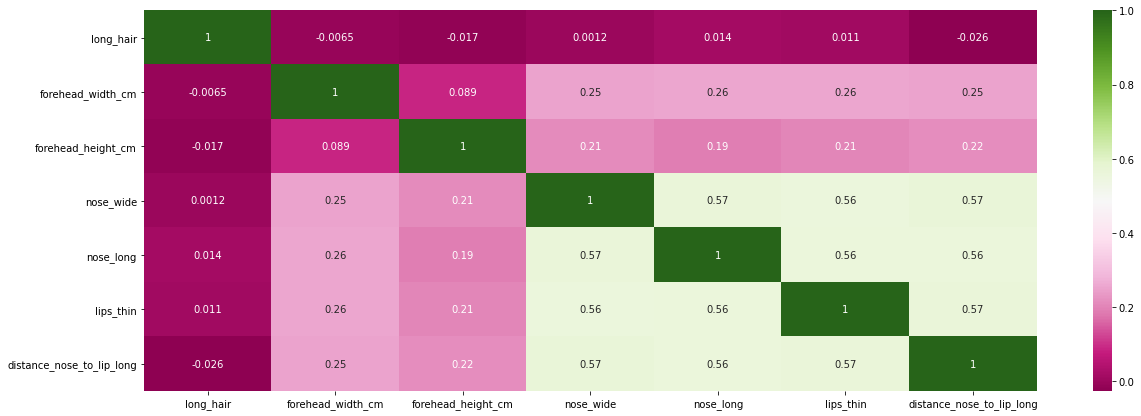

In [6]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), cmap="PiYG", annot = True)
plt.show()

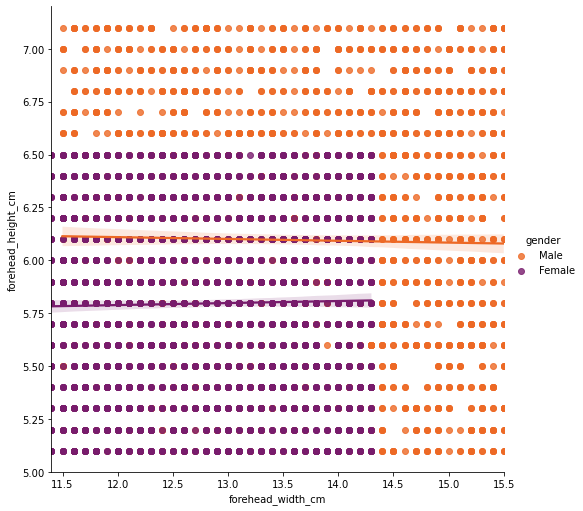

In [7]:
sns.lmplot(x="forehead_width_cm", y="forehead_height_cm", hue="gender", data=df, palette = 'inferno_r', height = 7)

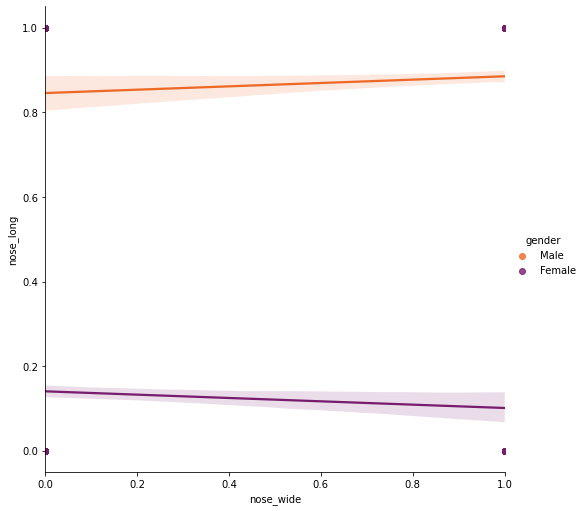

In [8]:
sns.lmplot(x="nose_wide", y="nose_long", hue="gender", data=df, palette = 'inferno_r', height = 7)

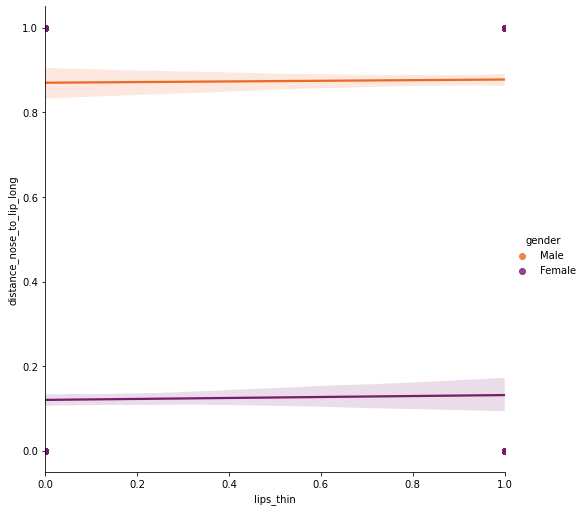

In [9]:
sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=df, palette = 'inferno_r', height = 7)

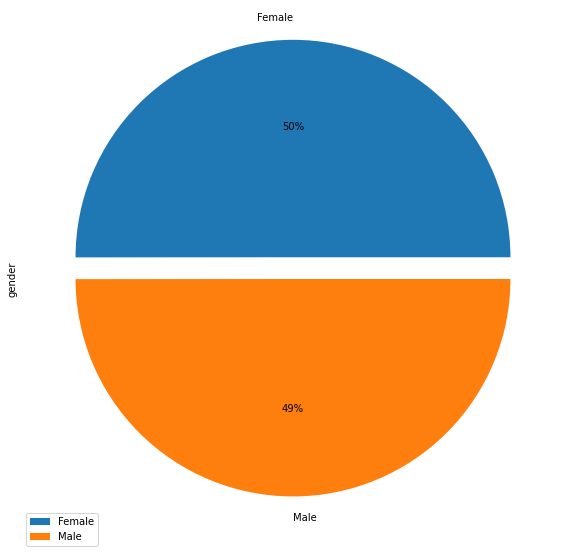

In [10]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
df['gender'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

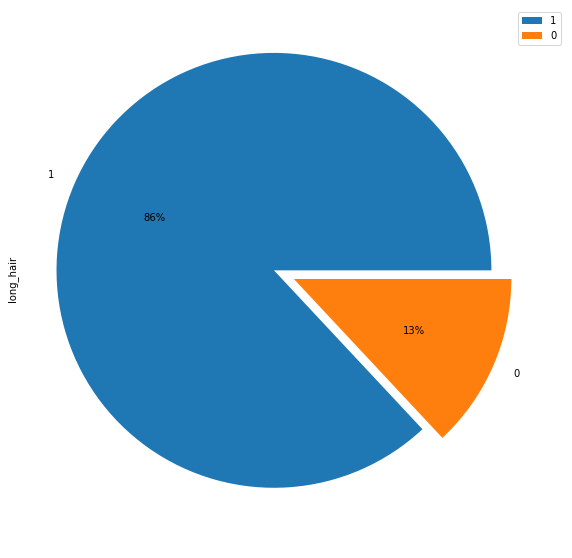

In [11]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
df['long_hair'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

# DATA PREPROCCESSING 

In [12]:
df = df.drop(["long_hair"], axis =1)
df.head()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,Male
1,14.0,5.4,0,0,1,0,Female
2,11.8,6.3,1,1,1,1,Male
3,14.4,6.1,0,1,1,1,Male
4,13.5,5.9,0,0,0,0,Female


In [13]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df['gender'] = LabelEncoder.fit_transform(df['gender'])

In [14]:
df

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
1,14.0,5.4,0,0,1,0,0
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
4,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0,0
4997,11.9,5.4,0,0,0,0,0
4998,12.9,5.7,0,0,0,0,0
4999,13.2,6.2,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   forehead_width_cm          5001 non-null   float64
 1   forehead_height_cm         5001 non-null   float64
 2   nose_wide                  5001 non-null   int64  
 3   nose_long                  5001 non-null   int64  
 4   lips_thin                  5001 non-null   int64  
 5   distance_nose_to_lip_long  5001 non-null   int64  
 6   gender                     5001 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 254.1 KB


In [16]:
x = df.drop(['gender'], axis = 1)
y = df['gender']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [18]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [19]:
def confusion_metrics (confusion_matrix):

    TP = confusion_matrix[0][0]
    TN = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    print('conf_accuracy:', conf_accuracy)
    
    conf_misclassification = 1- conf_accuracy
    print('conf_misclassification:', conf_misclassification)
    
    conf_sensitivity = (TP / float(TP + FN))
    print('conf_sensitivity:', conf_sensitivity)
    
    conf_specificity = (TN / float(TN + FP))
    print('conf_specificity:', conf_specificity)
   
    conf_precision = (TP / float(TP + FP))
    print('conf_precision:', conf_precision)
    
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('conf_f1:', conf_f1)

# DATA MODELLING

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
Lcm = confusion_metrics(confusion_matrix(y_test, predictions))

[[495  16]
 [ 16 474]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       511
           1       0.97      0.97      0.97       490

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

0.968031968031968
True Positives: 495
True Negatives: 474
False Positives: 16
False Negatives: 16
conf_accuracy: 0.968031968031968
conf_misclassification: 0.031968031968031996
conf_sensitivity: 0.9686888454011742
conf_specificity: 0.9673469387755103
conf_precision: 0.9686888454011742
conf_f1: 0.9686888454011743


# Desicion Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
Dt = confusion_metrics(confusion_matrix(y_test, predictions))

[[497  14]
 [ 22 468]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       511
           1       0.97      0.96      0.96       490

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

0.964035964035964
True Positives: 497
True Negatives: 468
False Positives: 14
False Negatives: 22
conf_accuracy: 0.964035964035964
conf_misclassification: 0.03596403596403597
conf_sensitivity: 0.9576107899807321
conf_specificity: 0.970954356846473
conf_precision: 0.9726027397260274
conf_f1: 0.9650485436893204


# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
Rf = confusion_metrics(confusion_matrix(y_test, predictions))

[[500  11]
 [ 18 472]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       511
           1       0.98      0.96      0.97       490

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

0.971028971028971
True Positives: 500
True Negatives: 472
False Positives: 11
False Negatives: 18
conf_accuracy: 0.971028971028971
conf_misclassification: 0.02897102897102899
conf_sensitivity: 0.9652509652509652
conf_specificity: 0.9772256728778468
conf_precision: 0.9784735812133072
conf_f1: 0.9718172983479104


# K-Nearest Neighbors Classifier

In [24]:
from sklearn.neighbors import  KNeighborsClassifier
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
KNN = confusion_metrics(confusion_matrix(y_test, predictions))

[[502   9]
 [ 17 473]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       511
           1       0.98      0.97      0.97       490

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

0.974025974025974
True Positives: 502
True Negatives: 473
False Positives: 9
False Negatives: 17
conf_accuracy: 0.974025974025974
conf_misclassification: 0.025974025974025983
conf_sensitivity: 0.9672447013487476
conf_specificity: 0.9813278008298755
conf_precision: 0.9823874755381604
conf_f1: 0.974757281553398


# Support Vector Classifier

In [25]:
from sklearn import svm
svm_classifier = svm.SVC() 
svm_classifier.fit(x_train,y_train)
predictions = svm_classifier.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
SVM = confusion_metrics(confusion_matrix(y_test, predictions))

[[493  18]
 [ 19 471]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       511
           1       0.96      0.96      0.96       490

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

0.9630369630369631
True Positives: 493
True Negatives: 471
False Positives: 18
False Negatives: 19
conf_accuracy: 0.9630369630369631
conf_misclassification: 0.03696303696303693
conf_sensitivity: 0.962890625
conf_specificity: 0.9631901840490797
conf_precision: 0.9647749510763209
conf_f1: 0.9638318670576734


# GaussianNB

In [26]:
from sklearn.naive_bayes import GaussianNB
classify = GaussianNB()
classify.fit(x_train, y_train)
predictions = classify.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
GNB = confusion_metrics(confusion_matrix(y_test, predictions))

[[498  13]
 [ 17 473]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       511
           1       0.97      0.97      0.97       490

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

0.97002997002997
True Positives: 498
True Negatives: 473
False Positives: 13
False Negatives: 17
conf_accuracy: 0.97002997002997
conf_misclassification: 0.029970029970029954
conf_sensitivity: 0.9669902912621359
conf_specificity: 0.9732510288065843
conf_precision: 0.974559686888454
conf_f1: 0.9707602339181286
